In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [245]:
train_data = pd.read_csv('train-data.csv', index_col=0)
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [246]:
#how many nan values in new price? should we drop it
train_data['New_Price'].isnull().sum()
#wow 5195, i think we should just drop new price column, as our data only has 6019 rows
#thats almost 80% of missing values
train_data.drop(['New_Price'], axis=1, inplace=True)
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [247]:
#now lets drop rows that has any nan values
train_data.dropna(inplace=True)
train_data
#okay only 6019-5981 = only 38 rows are dropped

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [248]:
#check dtypes
train_data.dtypes
#mileage needs to be split and change into int64
#engine and power as well
#change seats into int64
#price is in LAKH Rupee (in one hundred thousand rupee; 100.000rupee = 1 Lakh)
#New Price needs to be split and change into float64 or delete if the nan value exceeds 50%
#Price no needs to be change (already float64)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [249]:
#do the easiest one first which is seats
train_data['Seats'] = train_data['Seats'].astype('int')
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5,2.65


In [250]:
#lets change mileage
#split the values by space, then take the first splitted index to get the number only
train_data['Mileage'] = train_data['Mileage'].str.split(expand=True)[0]
train_data['Mileage'] = train_data['Mileage'].astype('float')
train_data.rename(columns = {'Mileage':'Mileage(kmpl)'}, inplace=True)

#now do the same to power and engine
train_data['Engine'] = train_data['Engine'].str.split(expand=True)[0]
train_data['Engine'] = train_data['Engine'].astype('int')
train_data.rename(columns = {'Engine':'Engine(CC)'}, inplace=True)

train_data['Power'] = train_data['Power'].str.split(expand=True)[0]
#our power column has 'null' string, not NAN but 'null'
#train_data['Power'] = train_data['Power'].astype('float')
train_data.rename(columns = {'Power':'Power(bhp)'}, inplace=True)

#now lets check this null values first
#train_data[train_data['Power(bhp)'].str.contains('null', regex= True, na=False)]
#yep, there is literally 'null' string inside the table instead of 'NAN'
#lets drop this 
train_data = train_data[train_data['Power(bhp)'] != 'null']
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype('float')
train_data
#done

<ipython-input-250-1ce5171d79ba>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Power(bhp)'] = train_data['Power(bhp)'].astype('float')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [251]:
#before we move, lets check the dtypes again 
train_data.dtypes
#okay looks good, now we can move to next phase

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage(kmpl)        float64
Engine(CC)             int32
Power(bhp)           float64
Seats                  int32
Price                float64
dtype: object

In [252]:
#first lets choose our features to train our model
#also remember that for a feature to be able to be used in machine learning model, it needs to be in either int or float type
#object type will cause ineffectiveness in our model, we need to do imputaion or amputation later
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage(kmpl)',
           'Engine(CC)', 'Power(bhp)', 'Seats']
y = train_data['Price']

In [253]:
#now lets do train test split in order to get MAE score (model accuracy) later
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data[features], y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [254]:
#i'm going to do amputation for our features, not imputation
#which metode, label encoding or one hot encoding? 
#depend on cardinality

#lets check the owner type first, we can change the values directly from ordinal (written in string) to cardinal
X_train['Owner_Type'].unique()
#there is 4 values, it means our owner_type has cardinality of 4
#cardinality is the number of unique values in a column, lower the cardinality means OH will work best
#because there will be less columns to make
#high cardinality works best with label encoding,
#or drop the columns or just change the specific values into int and the rest to 0 

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [255]:
#lets find the cardinality all ot once, doing each one will take a lot of time
low_cardinality_cols = [cname for cname in X_train[features].columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
low_cardinality_cols
#good our 3 features columns (which is all of our features with object type) has low cardinality
#it means we can use one hot encoding for these columns

['Fuel_Type', 'Transmission', 'Owner_Type']

In [256]:
#using OHencoder
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
#also OHE will creates new data frame for our result, so our original train test columns still intact
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding) in our original train test dataframe
# put our train test column in temporary dataframe without the categorical columns 
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)


# Add one-hot encoded columns to numerical features
#now concat (put back together) our temporary data frame with our one hot encoding result in new dataframe
#this dataframe is the df we are going to use to train and validate
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.reset_index(inplace=True, drop=True)


OH_X_train

,Year,Kilometers_Driven,Mileage(kmpl),Engine(CC),Power(bhp),Seats,0,1,2,3,4,5,6,7,8,9
0,2016,53886,25.17,799,53.30,5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2017,100400,25.00,1396,69.00,5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2017,9500,14.62,1999,149.92,5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2017,10000,19.27,2143,167.62,5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2016,31000,17.05,1995,190.00,5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,2017,58829,24.30,1248,88.50,5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4693,2014,32720,23.00,1396,90.00,5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4694,2007,90000,10.90,2499,143.00,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4695,2017,26400,23.10,998,67.04,5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [266]:
#now lets finally build our model
#here i'm using RANDOM FOREST REGRESSOR
#an ensemble method

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#now build and train our model
Random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
Random_forest_regressor.fit(OH_X_train, y_train)

#now check our model accuracy using MAE approach
preds = Random_forest_regressor.predict(OH_X_valid)
print(mean_absolute_error(y_valid, preds))
#our model MAE is 1.69 lakh accuracy, thats pretty big

1.6882682935157043


In [258]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, preds)

12.473016193367505

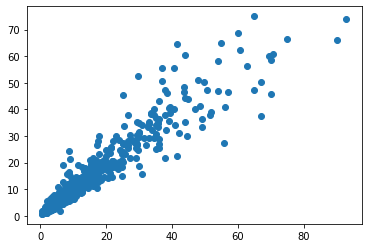

In [259]:
#lets visualize the accuracy to see better
import matplotlib.pyplot as plt
plt.scatter(list((y_valid)), preds)
#plt.scatter(preds, preds)
plt.show()

In [260]:
#now lets do the actual prediction
pred_data = pd.read_csv('test-data.csv', index_col=0)
pred_data
#now lets the the exact data cleaning we had done previously with our train data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [261]:
#drop new price column
pred_data.drop(['New_Price'], axis=1, inplace=True)
#check the dtypes as well
pred_data.dtypes
#mileage needs to be split and change into int64
#engine and power as well
#change seats into int64
#price is in LAKH Rupee (in one hundred thousand rupee; 100.000rupee = 1 Lakh)
#we need to do the exact same thing

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [262]:
#now lets drop rows that has any nan values
pred_data.dropna(inplace=True)
#change Seats dtype
pred_data['Seats'] = pred_data['Seats'].astype('int')

#lets change mileage
#split the values by space, then take the first splitted index to get the number only
pred_data['Mileage'] = pred_data['Mileage'].str.split(expand=True)[0]
pred_data['Mileage'] = pred_data['Mileage'].astype('float')
pred_data.rename(columns = {'Mileage':'Mileage(kmpl)'}, inplace=True)

#now do the same to power and engine
pred_data['Engine'] = pred_data['Engine'].str.split(expand=True)[0]
pred_data['Engine'] = pred_data['Engine'].astype('int')
pred_data.rename(columns = {'Engine':'Engine(CC)'}, inplace=True)

pred_data['Power'] = pred_data['Power'].str.split(expand=True)[0]
#our power column has 'null' string, not NAN but 'null'
#train_data['Power'] = train_data['Power'].astype('float')
pred_data.rename(columns = {'Power':'Power(bhp)'}, inplace=True)

#now lets check this null values first
#train_data[train_data['Power(bhp)'].str.contains('null', regex= True, na=False)]
#yep, there is literally 'null' string inside the table instead of 'NAN'
#lets drop this 
pred_data = pred_data[pred_data['Power(bhp)'] != 'null']
pred_data['Power(bhp)'] = pred_data['Power(bhp)'].astype('float')
pred_data.reset_index(inplace=True, drop=True)
pred_data
#done

<ipython-input-262-8776366819f9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data['Power(bhp)'] = pred_data['Power(bhp)'].astype('float')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7
3,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5
4,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179,140.00,7
...,...,...,...,...,...,...,...,...,...,...,...
1196,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5
1197,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5
1198,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5
1199,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5


In [263]:
#since this is the data we are going to predict, we dont need to split the data

pred_features = pred_data[features]

#lets find the cardinality all ot once, doing each one will take a lot of time
low_cardinality_cols = [cname for cname in pred_data[features].columns if pred_data[cname].nunique() < 10 and 
                        pred_data[cname].dtype == "object"]
low_cardinality_cols

#now like our training data, we still need to deal with categorical variables

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_pred = pd.DataFrame(OH_encoder.fit_transform(pred_features[low_cardinality_cols]))

# One-hot encoding removed index; put it back
#also OHE will creates new data frame for our result, so our original train test columns still intact
OH_cols_pred.index = pred_features.index


# Remove categorical columns (will replace with one-hot encoding) in our original train test dataframe
# put our train test column in temporary dataframe without the categorical columns 
num_X_train = pred_features.drop(low_cardinality_cols, axis=1)


# Add one-hot encoded columns to numerical features
#now concat (put back together) our temporary data frame with our one hot encoding result in new dataframe
#this dataframe is the df we are going to use to train and validate
OH_pred = pd.concat([num_X_train, OH_cols_pred], axis=1)

OH_pred

,Year,Kilometers_Driven,Mileage(kmpl),Engine(CC),Power(bhp),Seats,0,1,2,3,4,5,6,7,8,9
0,2014,40929,32.26,998,58.20,4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2013,54493,24.70,796,47.30,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2017,34000,13.68,2393,147.80,7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2014,29000,18.50,1197,82.85,5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2016,85609,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,2011,89411,20.54,1598,103.60,5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1197,2015,59000,17.21,1197,103.60,5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1198,2012,28000,23.08,1461,63.10,5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1199,2013,52262,17.20,1197,103.60,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [267]:
#NOW we just need to predict the cars price
preds = Random_forest_regressor.predict(OH_pred)

#now lets create a new dataframe to pair the cars' name with its respective prediction result
cars_price_result = pd.DataFrame({'Name': pred_data['Name'], 'Price_Prediction': preds})
cars_price_result.to_csv('Cars_Price_Prediction_Result.csv')

In [268]:
cars_price_result

,Name,Price_Prediction
0,Maruti Alto K10 LXI CNG,3.36950
1,Maruti Alto 800 2016-2019 LXI,2.32340
2,Toyota Innova Crysta Touring Sport 2.4 MT,17.69510
3,Hyundai i20 Magna,4.51160
4,Mahindra XUV500 W8 2WD,12.90340
...,...,...
1196,Volkswagen Vento Diesel Trendline,3.85030
1197,Volkswagen Polo GT TSI,6.53280
1198,Nissan Micra Diesel XV,2.85370
1199,Volkswagen Polo GT TSI,4.52750
